# Functional connectivity: per subject

In [1]:
# import necessary libraries
import pickle as pk
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from rich import pretty
from rich.progress import track
from seaborn import heatmap
from tqdm import tqdm

pretty.install()

sb.set_theme(style="ticks", context="paper")

results_dir = "../results/functional_connectivity/"
data_dir = "../data/"
Path(results_dir).mkdir(parents=True, exist_ok=True)
Path(data_dir).mkdir(parents=True, exist_ok=True)

## Load data

In [3]:
corr6_dict = pk.load(open(f"{data_dir}preprocessing/EEG_per_condition_corr.pkl", "rb"))

## Dataframe of correlation matrices 6x6

In [4]:
# Crea le liste vuote per le colonne del DataFrame
group_list = []
subject_list = []
condition_list = []
element_list = []
value_list = []

for group in corr6_dict:
    my_group = group
    for subject in corr6_dict[my_group].keys():
        for condition in corr6_dict[my_group][subject].keys():
            correlation = corr6_dict[my_group][subject][condition]
            channels = correlation.columns.tolist()
            # Utilizza un ciclo basato sull'indice dei canali
            for i in range(len(channels)):
                # Seleziona solo combinazioni con indici di canale unici
                for j in range(i + 1, len(channels)):
                    channel_i = channels[i]
                    channel_j = channels[j]
                    group_list.append(my_group)
                    subject_list.append(subject)
                    condition_list.append(condition)
                    element_list.append(
                        f"{channel_i}-{channel_j}"
                    )  # Crea la stringa con la coppia di indici (i, j)
                    value_list.append(
                        correlation.iloc[i, j]
                    )  # Ottieni il valore di correlazione corrispondente all'elemento (i, j)

# Crea un nuovo DataFrame con le liste create
tidy_corr_dict = {
    "Group": group_list,
    "Subject": subject_list,
    "Condition": condition_list,
    "Element": element_list,
    "Value": value_list,
}
corrdf = pd.DataFrame(tidy_corr_dict)

In [5]:
corrdf.head(20)

,Group,Subject,Condition,Element,Value
0,high,01,ROE,F7-F3,0.977129
1,high,01,ROE,F7-FZ,0.922700
2,high,01,ROE,F7-F4,0.708746
3,high,01,ROE,F7-F8,0.926123
4,high,01,ROE,F7-C3,-0.376381
5,high,01,ROE,F7-C4,0.238414
6,high,01,ROE,F7-T7,0.876804
7,high,01,ROE,F7-CZ,-0.412019
8,high,01,ROE,F7-T8,0.857471
9,high,01,ROE,F7-P3,-0.544522


## Functional connectivity: per subj. per group

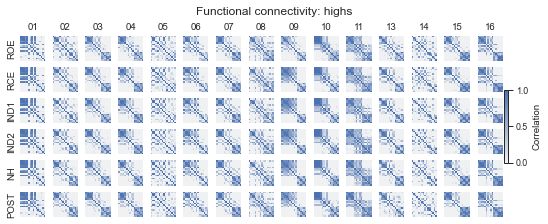

In [6]:
# group of subjects to study
my_group = "high"

# get the number of subjects and conditions in the data
n_subjects = len(corr6_dict[my_group])
n_conditions = len(corr6_dict[my_group][list(corr6_dict[my_group].keys())[0]])

# calculate the dimensions of the figure
fig_height = n_conditions
fig_width = n_subjects

# create a grid of subplots for the heatmaps
fig, axs = plt.subplots(
    nrows=n_conditions,
    ncols=n_subjects,
    figsize=(fig_width / 2, fig_height / 2),
    layout="constrained",
)

subject_idx = 0
for key_s, value_s in corr6_dict[my_group].items():
    condition_idx = 0
    for key_c, value_c in value_s.items():
        ax = heatmap(
            data=value_c,
            ax=axs[condition_idx, subject_idx],
            cbar=False,
            vmin=0,
            vmax=1,
            cmap=sb.color_palette("light:b", as_cmap=True),
            square=True,
        )
        axs[condition_idx, subject_idx].set_xticks([])
        axs[condition_idx, subject_idx].set_yticks([])
        if condition_idx == 0:
            axs[condition_idx, subject_idx].set_title(key_s)
        if subject_idx == 0:
            axs[condition_idx, subject_idx].set_ylabel(key_c)
        condition_idx += 1
    subject_idx += 1

# add the title to the figure
fig.suptitle(f"Functional connectivity: {my_group}s")
fig.colorbar(
    ax.get_children()[0],
    ax=axs[:, -1],
    shrink=0.4,
    ticks=[0, 0.5, 1],
    label="Correlation",
)

# adjust spacing and save the figure
# fig.tight_layout()

fig_name = f"FC_matrices_{my_group}"
fig.savefig(
    f"{results_dir}{fig_name}.png", dpi=300, bbox_inches="tight", facecolor="white"
)
# fig.savefig(f"{results_dir}FC_matrices_{my_group}.pdf", dpi=300, bbox_inches="tight")

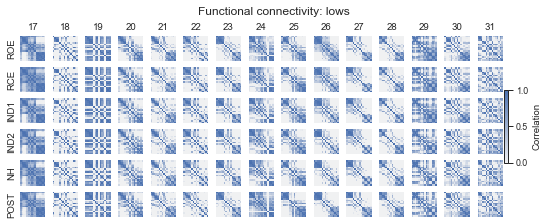

In [24]:
# group of subjects to study
my_group = "low"

# get the number of subjects and conditions in the data
n_subjects = len(corr6_dict[my_group])
n_conditions = len(corr6_dict[my_group][list(corr6_dict[my_group].keys())[0]])

# calculate the dimensions of the figure
fig_height = n_conditions
fig_width = n_subjects

# create a grid of subplots for the heatmaps
fig, axs = plt.subplots(
    nrows=n_conditions,
    ncols=n_subjects,
    figsize=(fig_width / 2, fig_height / 2),
    layout="constrained",
)

subject_idx = 0
for key_s, value_s in corr6_dict[my_group].items():
    condition_idx = 0
    for key_c, value_c in value_s.items():
        ax = heatmap(
            data=value_c,
            ax=axs[condition_idx, subject_idx],
            cbar=False,
            vmin=0,
            vmax=1,
            cmap=sb.color_palette("light:b", as_cmap=True),
            square=True,
        )
        axs[condition_idx, subject_idx].set_xticks([])
        axs[condition_idx, subject_idx].set_yticks([])
        if condition_idx == 0:
            axs[condition_idx, subject_idx].set_title(key_s)
        if subject_idx == 0:
            axs[condition_idx, subject_idx].set_ylabel(key_c)
        condition_idx += 1
    subject_idx += 1

# add the title to the figure
fig.suptitle(f"Functional connectivity: {my_group}s")
fig.colorbar(
    ax.get_children()[0],
    ax=axs[:, -1],
    shrink=0.4,
    ticks=[0, 0.5, 1],
    label="Correlation",
)

# adjust spacing and save the figure
# fig.tight_layout()

fig_name = f"FC_matrices_{my_group}"
fig.savefig(
    f"{results_dir}{fig_name}.png", dpi=300, bbox_inches="tight", facecolor="white"
)
# fig.savefig(f"{results_dir}FC_matrices_{my_group}.pdf", dpi=300, bbox_inches="tight")